In [248]:
import numpy as np
import pandas as pd
import re
from copy import deepcopy

In [249]:
dataset = pd.read_csv("RAW_recipes.csv")

In [250]:
df = deepcopy(dataset)

In [251]:
df.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...
231632,zydeco soup,60,"[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...","['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,5,"[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,40,"[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,29,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"['butter', 'eagle brand condensed milk', 'ligh...",10


In [252]:
def add_dict(lst):
    lst = [lst[i] for i in [0,1,4,6]]
    keys = ['Calories', 'Total fat','Protein','Carbohydrates']
    return dict(zip(keys,lst))

In [253]:
df['nutrition'] = df['nutrition'].apply(lambda s : [float(s) for s in re.findall(r'\d+\.', s)])
df['nutrition'] = df['nutrition'].apply(lambda x : add_dict(x))

In [254]:
df.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,55,"{'Calories': 51.0, 'Total fat': 0.0, 'Protein'...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,30,"{'Calories': 173.0, 'Total fat': 18.0, 'Protei...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,130,"{'Calories': 269.0, 'Total fat': 22.0, 'Protei...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,45,"{'Calories': 368.0, 'Total fat': 17.0, 'Protei...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,190,"{'Calories': 352.0, 'Total fat': 1.0, 'Protein...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...
231632,zydeco soup,60,"{'Calories': 415.0, 'Total fat': 26.0, 'Protei...",7,"['heat oil in a 4-quart dutch oven', 'add cele...","['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,5,"{'Calories': 14.0, 'Total fat': 0.0, 'Protein'...",1,['mix all ingredients together thoroughly'],"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,40,"{'Calories': 59.0, 'Total fat': 6.0, 'Protein'...",7,"['in a bowl , combine the mashed yolks and may...","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,29,"{'Calories': 188.0, 'Total fat': 11.0, 'Protei...",9,['place melted butter in a large mixing bowl a...,"['butter', 'eagle brand condensed milk', 'ligh...",10


In [255]:
df_ = df[df['minutes'] <= 60]

In [256]:
df_.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","{'Calories': 51.0, 'Total fat': 0.0, 'Protein'...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","{'Calories': 173.0, 'Total fat': 18.0, 'Protei...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","{'Calories': 368.0, 'Total fat': 17.0, 'Protei...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","{'Calories': 160.0, 'Total fat': 10.0, 'Protei...",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","{'Calories': 380.0, 'Total fat': 53.0, 'Protei...",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9


In [257]:
df_.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,55,"{'Calories': 51.0, 'Total fat': 0.0, 'Protein'...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,30,"{'Calories': 173.0, 'Total fat': 18.0, 'Protei...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6
3,alouette potatoes,45,"{'Calories': 368.0, 'Total fat': 17.0, 'Protei...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11
5,apple a day milk shake,0,"{'Calories': 160.0, 'Total fat': 10.0, 'Protei...",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,15,"{'Calories': 380.0, 'Total fat': 53.0, 'Protei...",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9
...,...,...,...,...,...,...,...
231632,zydeco soup,60,"{'Calories': 415.0, 'Total fat': 26.0, 'Protei...",7,"['heat oil in a 4-quart dutch oven', 'add cele...","['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,5,"{'Calories': 14.0, 'Total fat': 0.0, 'Protein'...",1,['mix all ingredients together thoroughly'],"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,40,"{'Calories': 59.0, 'Total fat': 6.0, 'Protein'...",7,"['in a bowl , combine the mashed yolks and may...","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,29,"{'Calories': 188.0, 'Total fat': 11.0, 'Protei...",9,['place melted butter in a large mixing bowl a...,"['butter', 'eagle brand condensed milk', 'ligh...",10


In [258]:
df2 = deepcopy(df_)

In [259]:
df2['steps'] = df2['steps'].str.replace("', '", "###")
df2['ingredients'] = df2['ingredients'].str.replace("', '", "###")

In [260]:
df2.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,55,"{'Calories': 51.0, 'Total fat': 0.0, 'Protein'...",11,['make a choice and proceed with recipe###depe...,['winter squash###mexican seasoning###mixed sp...,7
1,a bit different breakfast pizza,30,"{'Calories': 173.0, 'Total fat': 18.0, 'Protei...",9,['preheat oven to 425 degrees f###press dough ...,['prepared pizza crust###sausage patty###eggs#...,6
3,alouette potatoes,45,"{'Calories': 368.0, 'Total fat': 17.0, 'Protei...",11,['place potatoes in a large pot of lightly sal...,['spreadable cheese with garlic and herbs###ne...,11
5,apple a day milk shake,0,"{'Calories': 160.0, 'Total fat': 10.0, 'Protei...",4,['combine ingredients in blender###cover and b...,['milk###vanilla ice cream###frozen apple juic...,4
6,aww marinated olives,15,"{'Calories': 380.0, 'Total fat': 53.0, 'Protei...",4,['toast the fennel seeds and lightly crush the...,['fennel seeds###green olives###ripe olives###...,9
...,...,...,...,...,...,...,...
231632,zydeco soup,60,"{'Calories': 415.0, 'Total fat': 26.0, 'Protei...",7,['heat oil in a 4-quart dutch oven###add celer...,['celery###onion###green sweet pepper###garlic...,22
231633,zydeco spice mix,5,"{'Calories': 14.0, 'Total fat': 0.0, 'Protein'...",1,['mix all ingredients together thoroughly'],['paprika###salt###garlic powder###onion powde...,13
231634,zydeco ya ya deviled eggs,40,"{'Calories': 59.0, 'Total fat': 6.0, 'Protein'...",7,"['in a bowl , combine the mashed yolks and may...",['hard-cooked eggs###mayonnaise###dijon mustar...,8
231635,cookies by design cookies on a stick,29,"{'Calories': 188.0, 'Total fat': 11.0, 'Protei...",9,['place melted butter in a large mixing bowl a...,['butter###eagle brand condensed milk###light ...,10


In [261]:
df_to_cluster = deepcopy(df2)

In [262]:
df_to_cluster.drop(['nutrition', 'steps', 'ingredients','id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,n_steps,n_ingredients
0,arriba baked winter squash mexican style,55,11,7
1,a bit different breakfast pizza,30,9,6
3,alouette potatoes,45,11,11
5,apple a day milk shake,0,4,4
6,aww marinated olives,15,4,9
...,...,...,...,...
231632,zydeco soup,60,7,22
231633,zydeco spice mix,5,1,13
231634,zydeco ya ya deviled eggs,40,7,8
231635,cookies by design cookies on a stick,29,9,10


In [266]:
from matplotlib import pyplot as plt
import seaborn as sns

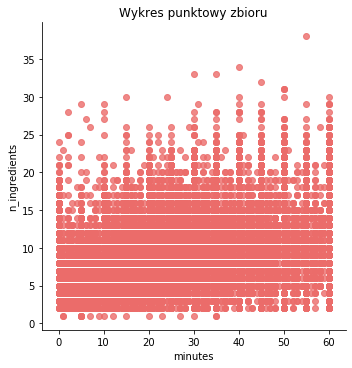

In [267]:
sns.lmplot(data=df_to_cluster, x='minutes', y='n_ingredients', fit_reg=False, scatter_kws={"color": "#eb6c6a"}).set(title = 'Wykres punktowy zbioru')
plt.show()

In [270]:
type(df_['ingredients'][0])

str

In [273]:
new_df = df_to_cluster[df_to_cluster['n_ingredients']<=10]

In [275]:
new_df.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,55,"{'Calories': 51.0, 'Total fat': 0.0, 'Protein'...",11,['make a choice and proceed with recipe###depe...,['winter squash###mexican seasoning###mixed sp...,7
1,a bit different breakfast pizza,30,"{'Calories': 173.0, 'Total fat': 18.0, 'Protei...",9,['preheat oven to 425 degrees f###press dough ...,['prepared pizza crust###sausage patty###eggs#...,6
5,apple a day milk shake,0,"{'Calories': 160.0, 'Total fat': 10.0, 'Protei...",4,['combine ingredients in blender###cover and b...,['milk###vanilla ice cream###frozen apple juic...,4
6,aww marinated olives,15,"{'Calories': 380.0, 'Total fat': 53.0, 'Protei...",4,['toast the fennel seeds and lightly crush the...,['fennel seeds###green olives###ripe olives###...,9
10,berry good sandwich spread,5,"{'Calories': 79.0, 'Total fat': 3.0, 'Protein'...",2,"['in medium size bowl , coarsely mash cranberr...",['whole berry cranberry sauce###sour cream###p...,3
...,...,...,...,...,...,...,...
231629,zydeco salad,5,"{'Calories': 14.0, 'Total fat': 0.0, 'Protein'...",4,['place the lettuce on a platter or serving di...,['iceberg lettuce###tomatoes###3 bean mix###ol...,4
231630,zydeco sauce,15,"{'Calories': 239.0, 'Total fat': 30.0, 'Protei...",3,"['to make the sauce , combine the mayonnaise ,...",['mayonnaise###prepared horseradish###worceste...,6
231634,zydeco ya ya deviled eggs,40,"{'Calories': 59.0, 'Total fat': 6.0, 'Protein'...",7,"['in a bowl , combine the mashed yolks and may...",['hard-cooked eggs###mayonnaise###dijon mustar...,8
231635,cookies by design cookies on a stick,29,"{'Calories': 188.0, 'Total fat': 11.0, 'Protei...",9,['place melted butter in a large mixing bowl a...,['butter###eagle brand condensed milk###light ...,10


In [276]:
np.random.seed(10)
remove_n = 100000
drop_indices = np.random.choice(new_df.index, remove_n, replace=False)
df_subset = new_df.drop(drop_indices)

In [280]:
df_subset = df_subset.drop(['id', 'contributor_id', 'submitted', 'tags', 'description'], axis=1)

In [281]:
minutes_d = df_subset.minutes > 10
minutes_u = df_subset.minutes < 30
filters = minutes_d & minutes_u
df_subset[filters]

,name,minutes,nutrition,n_steps,steps,ingredients,n_ingredients
24,easiest ever hollandaise sauce,25,"{'Calories': 1290.0, 'Total fat': 213.0, 'Prot...",7,['cut the butter into several pieces and bring...,"['butter###lemon, juice of###salt###white pepp...",5
76,pizza stuffed potato,25,"{'Calories': 183.0, 'Total fat': 12.0, 'Protei...",8,['preheat oven to 450 degrees###cut potato in ...,['baking potato###mozzarella cheese###tomato s...,7
153,berry french toast oatmeal,12,"{'Calories': 190.0, 'Total fat': 8.0, 'Protein...",5,['add 1 / 2 cup old-fashioned oats and 1 cup w...,['old fashioned oats###water###berries###groun...,6
177,creamsicle smoothie,15,"{'Calories': 248.0, 'Total fat': 1.0, 'Protein...",5,['peel mangoes and remove as much flesh around...,['mangoes###oranges###vanilla bean###strawberr...,5
195,fried cauliflower,15,"{'Calories': 161.0, 'Total fat': 15.0, 'Protei...",9,"['in a shallow medium bowl , beat egg lightly#...",['egg###plain breadcrumbs###cauliflower floret...,7
...,...,...,...,...,...,...,...
231433,zucchini with bacon cheese,22,"{'Calories': 161.0, 'Total fat': 16.0, 'Protei...",7,['have a pot of water boiling###drop in the zu...,['zucchini###tomatoes###cilantro###jalapeno pe...,8
231440,zucchini with cumin and coriander,17,"{'Calories': 101.0, 'Total fat': 14.0, 'Protei...",3,['heat the butter and oil together in a saute ...,['zucchini###butter###olive oil###ground cumin...,8
231450,zucchini with orange rice,20,"{'Calories': 101.0, 'Total fat': 7.0, 'Protein...",6,['halve zucchini lengthwise###place in a singl...,['zucchini###cooked brown rice###green onion##...,8
231455,zucchini with red wine dressing goat s cheese,15,"{'Calories': 620.0, 'Total fat': 78.0, 'Protei...",9,['preheat a barbecue grill or chargrill on med...,['green zucchini###olive oil###salt & freshly ...,7


In [295]:
butter_count = df_subset['ingredients'].str.contains('butter').sum()
print(butter_count)

6905


In [297]:
df_subset.to_csv('smaller_data.csv')